In [342]:
# import requests
from __future__ import print_function    # (at top of module)
import time
import sys
import os
import pandas as pd
import numpy as np
import pickle

PROJ_ROOT = os.path.join(os.getcwd(), os.pardir)

%load_ext watermark
%watermark -a "Thomas Turner" -d -t -v -p numpy,pandas -g

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Thomas Turner 07/29/2016 15:42:14 

CPython 3.5.2
IPython 5.0.0

numpy 1.11.1
pandas 0.18.1
Git hash: d3960db2e0cd50ca6bec82cf0d982f028aa8ff44


In [343]:
# load environment variables from .env file using dotenv.
from dotenv import load_dotenv
dotenv_path = os.path.join(PROJ_ROOT, '.env')
load_dotenv(dotenv_path)

# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)

# import my methods from the source code
%aimport data.spotipy_functions
from data.spotipy_functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [344]:
# run this to generate a fresh 100 track recomendations from a seed
# trackset = get_new_recs_and_feats(['1ohelc8DR2NNpUGukeCnGY'],100)
# trackset = band_BPMs(trackset,80,170)

# run this to SAVE trackset to file
# trackset.to_pickle(os.path.join(PROJ_ROOT,'data','interim','recommends_data_proto1.pkl'))

# run this to LOAD trackset from file
trackset = pd.read_pickle(os.path.join(PROJ_ROOT,'data','interim','recommends_data_proto1.pkl'))


In [345]:
# trackset.set_index(['id'])  <--- maybe not a good idea.

In [347]:
gui_cols = ['artist_name','track_name','id']
trained_so_far = 5
trackset.head(trained_so_far)[gui_cols]

,artist_name,track_name,id
0,Gorge,Imara,53Pyi4oxD0GLZljV0pWL4m
1,BODJ,Animotion,1NYgHAefsIeAU588SmBwDP
2,Oren Bi,Love Bright - El_Txef_A Remix,4Cu0jrAwQVEcM6bDy9fl8W
3,Los Suruba,Leopard (Boy Next Door Remix) [feat. Daniel Wi...,3Zumie1GpO4sriM5gnDjzg
4,Einzelkind,Trouble,2s9RYibspkXUqq6tN3djk6


In [348]:

# np.set_printoptions(precision=4)
# np.set_printoptions(suppress=True)
X = trackset.head(trained_so_far)[useful_features]
Y = [0,1,0,1,0]
w = np.array([1,1,1,1,1])

In [349]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y, sample_weight=w)

GaussianNB()

In [350]:
pd.options.display.float_format = '{:,.3f}'.format
predicts = pd.DataFrame(clf.predict_proba(trackset.tail(trackset.shape[0] - trained_so_far)[useful_features]))
predicts.columns = ['P_reject','P_accept']
predicts_labeled = trackset.tail(trackset.shape[0] - trained_so_far)[gui_cols].reset_index()
predicts_labeled['P_accept'] = predicts.P_accept
predicts_labeled.sort_values(by=['P_accept'], ascending=False)

,index,artist_name,track_name,id,P_accept
85,90,Olderic,Alma - Original,7dAkOi1SnHLppf2zlHzqDi,1.000
11,16,BODJ,ASSED,1MdiZZgLVRC0utNtTT0ZtZ,1.000
18,23,Gorge,Smile In My,5ZRRa5zJed4Lm80Ev2zyhX,0.974
93,98,Djebali,Hunting Back,560bRWeNieFF3S7oJjHqNW,0.969
83,88,BODJ,Get Raw,7oDjbogQUQl1ixHYqt8Rhg,0.957
65,70,BODJ,Altair,7LnntdNLzxRMMWJlnx46hC,0.929
42,47,Gavin Herlihy,Get Loose - Original Mix,2vGkoVGS1l58ipqLtIB4y3,0.913
51,56,Jordan Peak,Pass The Roach - Original Mix,5WFdH9Ggvok7iYW0WIyqc5,0.877
43,48,Gorge,Garuna - Solomun Remix,1BmLVSNZuHk2XztDswIc2c,0.300
3,8,Tom Flynn,Hoochie - Original Mix,2FVMT7qkgb5XgHDWOXIJC4,0.170


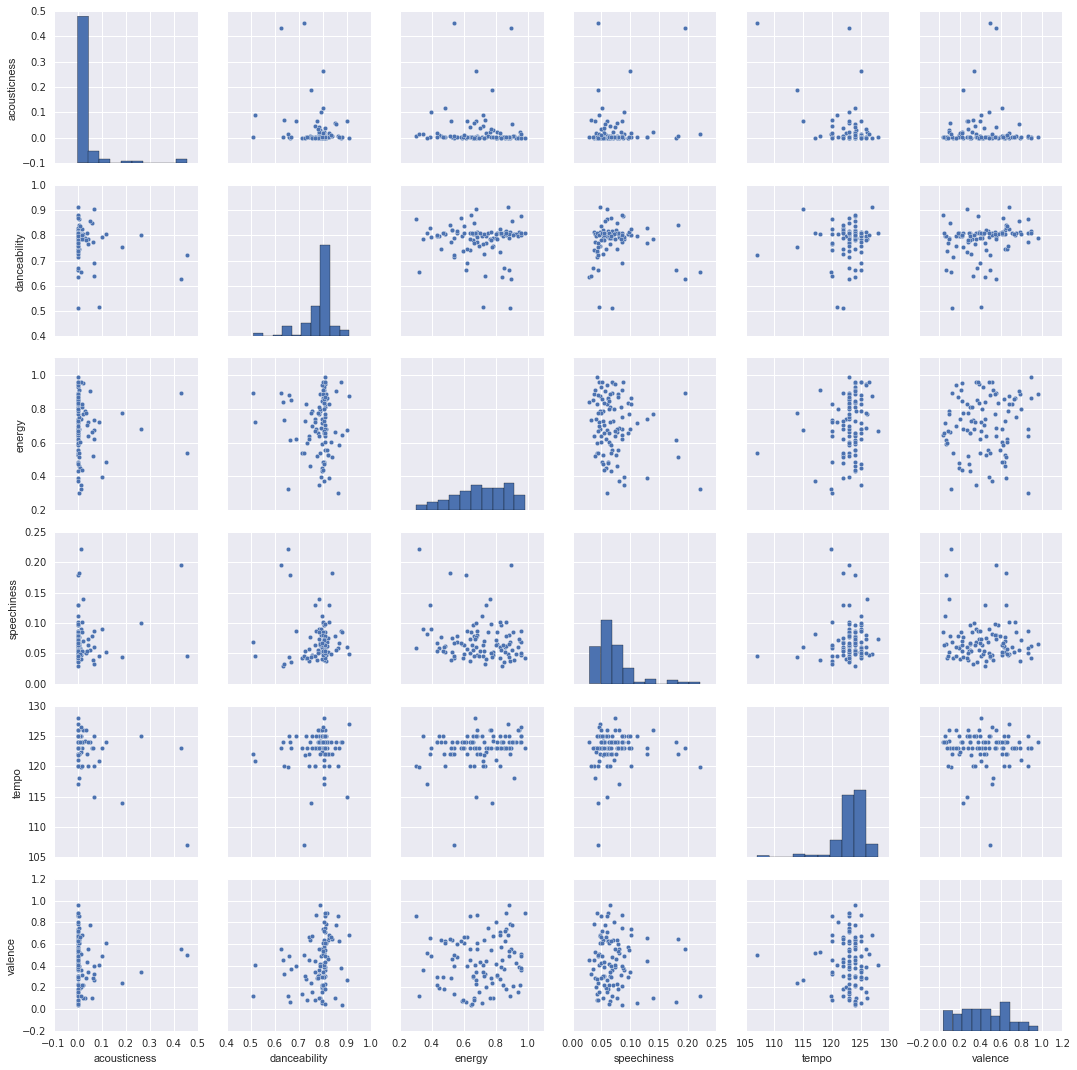

In [351]:
import seaborn as sb
useful_features = ['acousticness','danceability','energy','speechiness','tempo','valence']
sb.pairplot(trackset[useful_features])